In [142]:
import image_slicer 
import cv2 as cv
from numpy import array
from PIL import Image, ImageOps
import numpy as np
import sys, shutil
import os, os.path
import keras
import glob
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.layers import Conv2DTranspose, concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Reshape
from sklearn.model_selection import KFold
from numpy import asarray


In [147]:
#num_folds = 5
class_names = ['No0','Yes1']
class_names1 = ['lowerNo0' , 'lowerYes1'] #// folder name
class_names2 = ['upperNo0' , 'upperYes1']
x_train=[]
x_train1=[]
y_train=[]
y_train1=[]

In [148]:



def load_data(folder='C:/Users/Waqar/Desktop/zeeshan/DELL PC/DELL PC/One/Original'):
    c = 0
    for i in range(2):
        file_name = glob.glob(folder +'/'+str(class_names[i])+'/*')
        names=[]
        for path in file_name:
            foldername=os.path.basename(path)
            names.append(foldername)
        Original_Folder_Image_count = len(names)
        for j in range(Original_Folder_Image_count):  
            path = folder + "/" + str(class_names[i]) + "/" + str(names[j]) 
            #img=cv.imread(path,cv.IMREAD_GRAYSCALE)
            img = Image.open(path)
            gray_image = ImageOps.grayscale(img)
            PATH = glob.glob(path)
            for img in PATH:
                image_array=[]
                result = image_slicer.slice(img, 4)
                for res in result:
                    image_array.append(res.image)
                with Image.open(path) as im:
                    x, y = im.size
                totalsize = x*y
                if totalsize == 16384:
                    os.remove(path)
                a = np.array(image_array[0])
                b = np.array(image_array[1])
                c = np.array(image_array[2])
                d = np.array(image_array[3])
                #x = np.concatenate((a, b[...,None]), axis=2).shape
                x = np.stack((a,b), axis=2)
                y = np.stack((c,d), axis=2)
                x_train.append(x)
                x_train1.append(y)
    files= []
    path_to_your_files = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Original\No0'
    copy_to_path = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Lowers\lowerNo0'
    copy_to_path1 = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Uppers\upperNo0'
    path_to_your_files1 = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Original\No0'

    files_list = sorted(os.listdir(path_to_your_files))
    orders = range(3, len(files_list) ,4)
    orders1 = range(2, len(files_list) ,4)

    for order in orders:
        files = files_list[order] 
        shutil.move(os.path.join(path_to_your_files, files), os.path.join(copy_to_path, files))

    for a in orders1:
        files = files_list[a] 
        shutil.move(os.path.join(path_to_your_files, files), os.path.join(copy_to_path, files)) 
 
    files_list = sorted(os.listdir(path_to_your_files))
    for f in range(Original_Folder_Image_count*2):
        files = files_list[f]
        shutil.move(os.path.join(path_to_your_files1, files), os.path.join(copy_to_path1, files)) 

    files= []
    path_to_your_files = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Original\Yes1'
    copy_to_path = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Lowers\lowerYes1'
    copy_to_path1 = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Uppers\upperYes1'
    path_to_your_files1 = r'C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Original\Yes1'

    files_list = sorted(os.listdir(path_to_your_files))
    orders = range(3, len(files_list) ,4)
    orders1 = range(2, len(files_list) ,4)

    for order in orders:
        files = files_list[order] 
        shutil.move(os.path.join(path_to_your_files, files), os.path.join(copy_to_path, files))

    for a in orders1:
        files = files_list[a] 
        shutil.move(os.path.join(path_to_your_files, files), os.path.join(copy_to_path, files)) 

    files_list = sorted(os.listdir(path_to_your_files))
    for f in range(Original_Folder_Image_count*2):
        files = files_list[f]
        shutil.move(os.path.join(path_to_your_files1, files), os.path.join(copy_to_path1, files)) 
    Folder = r"C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Lowers"
    for g in range(2):
        file_name = glob.glob(Folder +'/'+str(class_names1[i])+'/*')
        names=[]
        for path in file_name:
            foldername=os.path.basename(path)
            names.append(foldername)
        for h in range(Original_Folder_Image_count):  
            path = Folder + "/" + str(class_names1[i]) + "/" + str(names[j]) 
            img = Image.open(path)
            gray_image = ImageOps.grayscale(img)
            PATH = glob.glob(path) 
            y_train.append(g)
    Folder1 = r"C:\Users\Waqar\Desktop\zeeshan\DELL PC\DELL PC\One\Uppers" 
    for g1 in range(2):
        file_name = glob.glob(Folder1 +'/'+str(class_names2[i])+'/*')
        names=[]
        for path in file_name:
            foldername=os.path.basename(path)
            names.append(foldername)
        for h in range(Original_Folder_Image_count):  
            path = Folder1 + "/" + str(class_names2[i]) + "/" + str(names[j]) 
            img = Image.open(path)
            gray_image = ImageOps.grayscale(img)
            PATH = glob.glob(path)
            y_train1.append(g1)

    return ((np.array(x_train),np.array(y_train)) , (np.array(x_train1),np.array(y_train1)))
    

In [149]:
(x_train, y_train) ,(x_train1,y_train1) = load_data()

print('y_train :' , y_train)
print('y_train1 :' , y_train1)

y_train : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 

In [167]:
batch_size = 50
num_classes = 2
epochs = 100

In [160]:
#testing 

x_train.shape


(800, 64, 64, 2)

In [151]:

x_test=[]
y_test=[] 
x_test1=[]
y_test1=[]


x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train1, y_train1, test_size=0.2)

x_train = x_train.astype('float32')
x_train1 = x_train1.astype('float32')
x_test = x_test.astype('float32')
x_test1 = x_test1.astype('float32')

x_train /= 255
x_train1 /= 255
x_test /= 255
x_test1 /= 255

x_train = x_train.reshape(x_train.shape[0],64, 64, 2) #upper region
x_test  = x_test.reshape(x_test.shape[0],64,64, 2)
x_train1 = x_train1.reshape(x_train1.shape[0],64, 64, 2) #lower region
x_test1 = x_test1.reshape(x_test1.shape[0],64, 64, 2)

print('x_train :', x_train.shape)
print('x_train1 :', x_train1.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train1.shape[0], 'train1 samples')
print(x_test1.shape[0], 'test1 samples')

y_train = keras.utils.to_categorical(y_train, num_classes) #no. of classes -> 0 (no fluid) & 1 (fluid) => 
y_test  = keras.utils.to_categorical(y_test, num_classes)
y_train1 = keras.utils.to_categorical(y_train1, num_classes)
y_test1  = keras.utils.to_categorical(y_test1, num_classes) 


x_train : (800, 64, 64, 2)
x_train1 : (800, 64, 64, 2)
800 train samples
200 test samples
800 train1 samples
200 test1 samples


In [177]:

#input_layer = Input((64, 64, 2)) # NO NEED TO REPEAT
#input_layer1 = Input((64, 64, 2))

def build_model(input_layer, start_neurons):
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer) #flattening the matrices
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)
    
    # Middle -> reverse traversal
    convm = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    convm = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(convm)
    
    # STEP 3 dECONVULATION -> PAPA'S PRINCESS
    deconv1= Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    
     
    W1= [0.4]
    W2 = [0.8]
    output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv1) #sigmoid function is used to return the bool daa based of real numbers  
    output_layer1 = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv1)
    R1= output_layer*W1
    R2= output_layer1*W2
  
    out = Flatten()(R1)
    out1 =Flatten()(R2)
    merge = concatenate([out, out1])
    out_put = Dense(2)(merge)
    
    model = Model(inputs=input_layer, outputs= out_put)

    
    return model

In [178]:
#Model 1

input_layer = Input((64, 64, 2))
model = build_model(input_layer, 4)
model.compile(optimizer="Adam", loss="mse", metrics=["mae", "acc"])


hist= model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(x_test, y_test))


scores = model.evaluate(x_test, y_test,verbose=1)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

########################Keras LIbraray Code#############

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:20])
print("predictions shape:", predictions.shape)




Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 8s 10ms/sample - loss: 5.0474 - mean_absolute_error: 1.8698 - acc: 0.4938 - val_loss: 3.1984 - val_mean_absolute_error: 1.7158 - val_acc: 0.5550
Epoch 2/100
800/800 [==============================] - 7s 8ms/sample - loss: 1.0679 - mean_absolute_error: 0.8575 - acc: 0.5113 - val_loss: 0.3632 - val_mean_absolute_error: 0.4791 - val_acc: 0.5550
Epoch 3/100
800/800 [==============================] - 6s 8ms/sample - loss: 0.4105 - mean_absolute_error: 0.5191 - acc: 0.5362 - val_loss: 0.3038 - val_mean_absolute_error: 0.4844 - val_acc: 0.5550
Epoch 4/100
800/800 [==============================] - 6s 8ms/sample - loss: 0.2826 - mean_absolute_error: 0.4986 - acc: 0.5075 - val_loss: 0.2739 - val_mean_absolute_error: 0.5074 - val_acc: 0.4450
Epoch 5/100
800/800 [==============================] - 6s 8ms/sample - loss: 0.2600 - mean_absolute_error: 0.4958 - acc: 0.5213 - val_loss: 0.2484 - val_mean

Epoch 42/100
800/800 [==============================] - 5s 6ms/sample - loss: 0.1835 - mean_absolute_error: 0.3646 - acc: 0.7538 - val_loss: 0.1956 - val_mean_absolute_error: 0.3773 - val_acc: 0.7400
Epoch 43/100
800/800 [==============================] - 5s 6ms/sample - loss: 0.1753 - mean_absolute_error: 0.3531 - acc: 0.7550 - val_loss: 0.1908 - val_mean_absolute_error: 0.3722 - val_acc: 0.7100
Epoch 44/100
800/800 [==============================] - 5s 6ms/sample - loss: 0.1825 - mean_absolute_error: 0.3516 - acc: 0.7437 - val_loss: 0.1958 - val_mean_absolute_error: 0.3701 - val_acc: 0.7000
Epoch 45/100
800/800 [==============================] - 5s 6ms/sample - loss: 0.1722 - mean_absolute_error: 0.3444 - acc: 0.7613 - val_loss: 0.1913 - val_mean_absolute_error: 0.3752 - val_acc: 0.7150
Epoch 46/100
800/800 [==============================] - 5s 6ms/sample - loss: 0.1721 - mean_absolute_error: 0.3484 - acc: 0.7625 - val_loss: 0.1934 - val_mean_absolute_error: 0.3658 - val_acc: 0.7050


Epoch 83/100
800/800 [==============================] - 5s 6ms/sample - loss: 0.1641 - mean_absolute_error: 0.3339 - acc: 0.7688 - val_loss: 0.2282 - val_mean_absolute_error: 0.4008 - val_acc: 0.6650
Epoch 84/100
800/800 [==============================] - 5s 6ms/sample - loss: 0.1602 - mean_absolute_error: 0.3353 - acc: 0.7750 - val_loss: 0.1881 - val_mean_absolute_error: 0.3624 - val_acc: 0.7250
Epoch 85/100
800/800 [==============================] - 5s 6ms/sample - loss: 0.1514 - mean_absolute_error: 0.3180 - acc: 0.7862 - val_loss: 0.1859 - val_mean_absolute_error: 0.3658 - val_acc: 0.7200
Epoch 86/100
800/800 [==============================] - 5s 6ms/sample - loss: 0.1575 - mean_absolute_error: 0.3236 - acc: 0.7738 - val_loss: 0.1922 - val_mean_absolute_error: 0.3735 - val_acc: 0.7150
Epoch 87/100
800/800 [==============================] - 5s 6ms/sample - loss: 0.1511 - mean_absolute_error: 0.3202 - acc: 0.7875 - val_loss: 0.2021 - val_mean_absolute_error: 0.3827 - val_acc: 0.6850


In [179]:
#Model 2

input_layer = Input((64, 64, 2))
model2 = build_model(input_layer, 4)
model2.compile(optimizer="Adam", loss="mse", metrics=["mae", "acc"])

hist1 = model2.fit(x_train1, y_train1, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(x_test1, y_test1))

scores1 = model2.evaluate(x_test1, y_test1,verbose=1)

print('Test loss:', scores1[0])
print('Test accuracy:', scores1[1])


########################Keras LIbraray Code#############

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test1, y_test1, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test1[:20])
print("predictions shape:", predictions.shape)

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 8s 10ms/sample - loss: 4.4731 - mean_absolute_error: 1.7613 - acc: 0.5100 - val_loss: 2.3299 - val_mean_absolute_error: 1.4010 - val_acc: 0.5200
Epoch 2/100
800/800 [==============================] - 6s 8ms/sample - loss: 0.9228 - mean_absolute_error: 0.7854 - acc: 0.4762 - val_loss: 0.4132 - val_mean_absolute_error: 0.5274 - val_acc: 0.5200
Epoch 3/100
800/800 [==============================] - 6s 8ms/sample - loss: 0.3743 - mean_absolute_error: 0.5151 - acc: 0.5238 - val_loss: 0.2889 - val_mean_absolute_error: 0.5016 - val_acc: 0.4800
Epoch 4/100
800/800 [==============================] - 6s 8ms/sample - loss: 0.2827 - mean_absolute_error: 0.5019 - acc: 0.4988 - val_loss: 0.2765 - val_mean_absolute_error: 0.4980 - val_acc: 0.4800
Epoch 5/100
800/800 [==============================] - 6s 8ms/sample - loss: 0.2532 - mean_absolute_error: 0.4912 - acc: 0.5425 - val_loss: 0.2432 - val_mean

Epoch 42/100
800/800 [==============================] - 4s 6ms/sample - loss: 0.1947 - mean_absolute_error: 0.3808 - acc: 0.7150 - val_loss: 0.1941 - val_mean_absolute_error: 0.3775 - val_acc: 0.7200
Epoch 43/100
800/800 [==============================] - 4s 6ms/sample - loss: 0.1896 - mean_absolute_error: 0.3779 - acc: 0.7262 - val_loss: 0.1947 - val_mean_absolute_error: 0.3764 - val_acc: 0.6650
Epoch 44/100
800/800 [==============================] - 5s 6ms/sample - loss: 0.1896 - mean_absolute_error: 0.3787 - acc: 0.7375 - val_loss: 0.1951 - val_mean_absolute_error: 0.3779 - val_acc: 0.7200
Epoch 45/100
800/800 [==============================] - 4s 6ms/sample - loss: 0.1935 - mean_absolute_error: 0.3817 - acc: 0.7237 - val_loss: 0.1921 - val_mean_absolute_error: 0.3756 - val_acc: 0.7050
Epoch 46/100
800/800 [==============================] - 5s 6ms/sample - loss: 0.1848 - mean_absolute_error: 0.3741 - acc: 0.7400 - val_loss: 0.1910 - val_mean_absolute_error: 0.3715 - val_acc: 0.7150


Epoch 83/100
800/800 [==============================] - 4s 6ms/sample - loss: 0.1695 - mean_absolute_error: 0.3444 - acc: 0.7600 - val_loss: 0.2062 - val_mean_absolute_error: 0.3814 - val_acc: 0.7050
Epoch 84/100
800/800 [==============================] - 4s 6ms/sample - loss: 0.1833 - mean_absolute_error: 0.3698 - acc: 0.7462 - val_loss: 0.1961 - val_mean_absolute_error: 0.3638 - val_acc: 0.7150
Epoch 85/100
800/800 [==============================] - 4s 5ms/sample - loss: 0.1722 - mean_absolute_error: 0.3449 - acc: 0.7675 - val_loss: 0.1979 - val_mean_absolute_error: 0.3666 - val_acc: 0.7050
Epoch 86/100
800/800 [==============================] - 4s 6ms/sample - loss: 0.1734 - mean_absolute_error: 0.3532 - acc: 0.7538 - val_loss: 0.1928 - val_mean_absolute_error: 0.3682 - val_acc: 0.7300
Epoch 87/100
800/800 [==============================] - 4s 6ms/sample - loss: 0.1685 - mean_absolute_error: 0.3462 - acc: 0.7700 - val_loss: 0.1932 - val_mean_absolute_error: 0.3569 - val_acc: 0.7200


In [174]:


print('Test Accuracy MOdel 1:', hist.history['acc'])
print('Val accuracy  MOdel 1:',hist.history['val_acc'])
print('Test Accuracy MOdel 2:', hist1.history['acc'])
print('Val accuracy  MOdel 2:',hist1.history['val_acc'])

Test Accuracy MOdel 1: [0.49625, 0.50125, 0.47125, 0.51625, 0.48125, 0.47125, 0.4975, 0.47625, 0.48, 0.50125, 0.51375, 0.50625, 0.50625, 0.48625, 0.50375, 0.51375, 0.5025, 0.685, 0.73625, 0.71625, 0.71, 0.72375, 0.72625, 0.74375, 0.7275, 0.75375, 0.67875, 0.74375, 0.70625, 0.73375, 0.69375, 0.7, 0.72625, 0.73125, 0.74375, 0.76625, 0.7575, 0.755, 0.7275, 0.74125, 0.73125, 0.71625, 0.73625, 0.7425, 0.75875, 0.77625, 0.75375, 0.76, 0.7775, 0.785, 0.76, 0.74875, 0.69, 0.73, 0.78, 0.7675, 0.78125, 0.745, 0.71, 0.79375, 0.78, 0.78625, 0.8, 0.77625, 0.7725, 0.7925, 0.8025, 0.82, 0.81375, 0.8, 0.8125, 0.80625, 0.82375, 0.80625, 0.83125, 0.82625, 0.81875, 0.81875, 0.82375, 0.83, 0.825, 0.835, 0.82625, 0.84375, 0.8525, 0.8325, 0.8425, 0.835, 0.87125, 0.85125, 0.84375, 0.84875, 0.86875, 0.8625, 0.8425, 0.86125, 0.85875, 0.865, 0.88, 0.87625]
Val accuracy  MOdel 1: [0.445, 0.555, 0.445, 0.555, 0.445, 0.445, 0.555, 0.445, 0.445, 0.555, 0.555, 0.445, 0.445, 0.555, 0.555, 0.445, 0.565, 0.655, 0.705, 

In [165]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

y_pred= model.predict(x_test)
y_true= y_test
y_pred=np.argmax(y_pred, axis=1)
y_true=np.argmax(y_test, axis=1)

cm=confusion_matrix(y_true,y_pred)


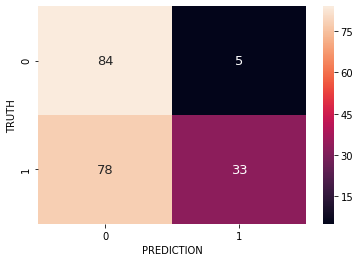

In [166]:
#cm = np.array([[41,0],[13,30]])
sns.heatmap(cm,annot=True,linecolor="white",annot_kws={"size": 13})
b, t = plt.ylim() # discover the values for bottom and top
#b += 0.5 # Add 0.5 to the bottom
#t -= 0.5 # Subtract 0.5 from the top
plt.xlabel("PREDICTION")
plt.ylabel("TRUTH")
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [129]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([41, 0], [43, 0], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [130]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true, y_pred)
print('AUC: %.2f' % auc)

AUC: 0.50


In [131]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

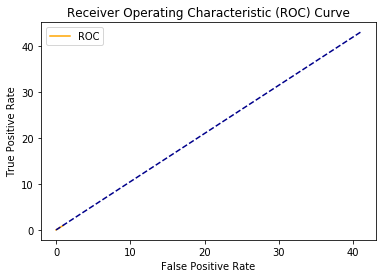

In [132]:
plot_roc_curve(fpr, tpr)